In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [177]:
df_gbg = pd.read_pickle('../Dataframes/df_wind_gbg.pkl')
df_vinga = pd.read_pickle('../Dataframes/df_wind_vinga.pkl')
df_save = pd.read_pickle('../Dataframes/df_wind_save.pkl')


Start with GBG

In [178]:
df_gbg

,Datum,Tid_UTC,Vindriktning,Kvalitet,Vindhastighet,Kvalitet_1,Year,Month,Snitt_per_dag,Max_uppmätta_hastighet
0,1961-01-01,06:00:00,180.0,G,0.0,G,1961,1,2.33,4.0
1,1961-01-01,12:00:00,180.0,G,4.0,G,1961,1,2.33,4.0
2,1961-01-01,18:00:00,140.0,G,3.0,G,1961,1,2.33,4.0
3,1961-01-02,06:00:00,180.0,G,4.0,G,1961,1,5.00,6.0
4,1961-01-02,12:00:00,180.0,G,5.0,G,1961,1,5.00,6.0
...,...,...,...,...,...,...,...,...,...,...
305146,2023-07-01,02:00:00,249.0,G,3.1,G,2023,7,2.47,3.5
305147,2023-07-01,03:00:00,226.0,G,2.2,G,2023,7,2.47,3.5
305148,2023-07-01,04:00:00,223.0,G,2.3,G,2023,7,2.47,3.5
305149,2023-07-01,05:00:00,217.0,G,1.9,G,2023,7,2.47,3.5


Create a plot that shows how many days per year there have been meassurement sreaching >13.m/s

In [179]:
df_gbg_limited = df_gbg[df_gbg['Max_uppmätta_hastighet'] >= 13.9]

In [180]:
years = df_gbg_limited['Year'].value_counts(sort=False).keys()

In [181]:
years_int = []
for i in years:
    years_int.append(i)

In [182]:
len(df_gbg_limited['Datum'][df_gbg_limited['Year'] == 1961].value_counts())


13

In [183]:
days_per_year = []

for i in years_int:
    days = len(df_gbg_limited['Datum'][df_gbg_limited['Year'] == i].value_counts())
    days_per_year.append(days)

In [184]:
list1 = list(zip(years_int, days_per_year))

In [185]:
list1[0][0]

1961

In [186]:
list1 = list(zip(years_int, days_per_year))
plot_years = []
plot_days = []
for i in range(1961, 2024):
    if i in years_int:
        ind = years_int.index(i)
        year = list1[ind][0]
        days = list1[ind][1]
        plot_years.append(year)
        plot_days.append(days)
    elif i not in years_int:
        plot_years.append(i)
        plot_days.append(0)


In [187]:
df_days_per_year_gbg = pd.DataFrame({'Year': plot_years, 'Days': plot_days})

In [188]:
df_days_per_year_gbg

,Year,Days
0,1961,13
1,1962,12
2,1963,6
3,1964,11
4,1965,5
...,...,...
58,2019,0
59,2020,0
60,2021,0
61,2022,0


<Axes: xlabel='Year', ylabel='Days'>

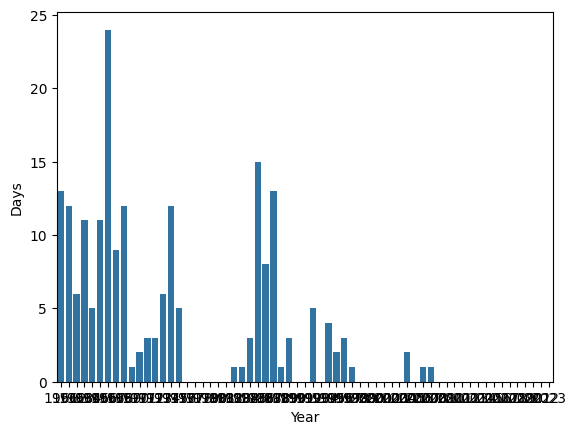

In [189]:
sns.barplot(df_days_per_year_gbg, x='Year', y='Days')

Continue with Säve

In [190]:
df_save_limited = df_save[df_save['Max_uppmätta_hastighet'] >= 13.9]

# Collect the years present
years_save = df_save_limited['Year'].value_counts(sort=False).keys()

# Transform to int
years_save_int = []
for i in years_save:
    years_save_int.append(i)

# Count the number of days for each year that exceeded 13.9m/s    
days_per_year_save = []
for i in years_save_int:
    days = len(df_save_limited['Datum'][df_save_limited['Year'] == i].value_counts())
    days_per_year_save.append(days)

# Create two lists that contain all number of days per year
# even fdor years that are not present
list1_save = list(zip(years_save_int, days_per_year_save))
plot_years_save = []
plot_days_save = []
for i in range(1961, 2024):
    if i in years_save_int:
        ind = years_save_int.index(i)
        year = list1_save[ind][0]
        days = list1_save[ind][1]
        plot_years_save.append(year)
        plot_days_save.append(days)
    elif i not in years_save_int:
        plot_years_save.append(i)
        plot_days_save.append(0)

df_days_per_year_save = pd.DataFrame({'Year': plot_years_save, 'Days': plot_days_save})


<Axes: xlabel='Year', ylabel='Days'>

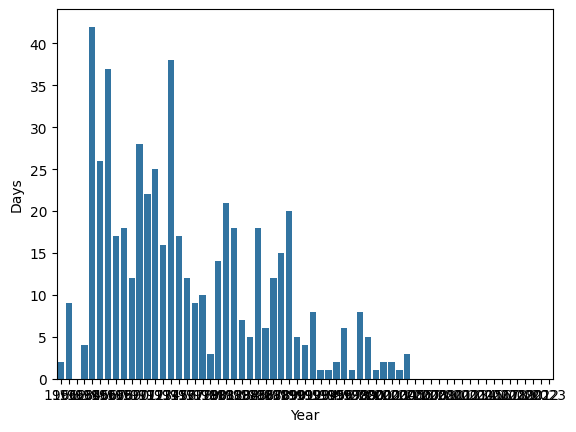

In [191]:
sns.barplot(df_days_per_year_save, x='Year', y='Days')

Compare with Vinga

In [192]:
df_vinga_limited = df_vinga[df_vinga['Max_uppmätta_hastighet'] >= 13.9]

# Collect the years present
years_vinga = df_vinga_limited['Year'].value_counts(sort=False).keys()

# Transform to int
years_vinga_int = []
for i in years_vinga:
    years_vinga_int.append(i)

# Count the number of days for each year that exceeded 13.9m/s    
days_per_year_vinga = []
for i in years_vinga_int:
    days = len(df_vinga_limited['Datum'][df_vinga_limited['Year'] == i].value_counts())
    days_per_year_vinga.append(days)

# Create two lists that contain all number of days per year
# even fdor years that are not present
list1_vinga = list(zip(years_vinga_int, days_per_year_vinga))
plot_years_vinga = []
plot_days_vinga = []
for i in range(1961, 2024):
    if i in years_vinga_int:
        ind = years_vinga_int.index(i)
        year = list1_vinga[ind][0]
        days = list1_vinga[ind][1]
        plot_years_vinga.append(year)
        plot_days_vinga.append(days)
    elif i not in years_vinga_int:
        plot_years_vinga.append(i)
        plot_days_vinga.append(0)

df_days_per_year_vinga = pd.DataFrame({'Year': plot_years_vinga, 'Days': plot_days_vinga})


Kolla när sista mätåret är på varje station, så vi kan märka ut det

In [193]:
last_year_gbg = df_gbg['Year'][-1:]
last_year_gbg = last_year_gbg.values[0]
last_year_save = df_save['Year'][-1:]
last_year_save = last_year_save.values[0]


In [194]:
df_days_per_year_gbg['Year'].dtype

dtype('int64')

In [195]:
last_year_gbg = np.int64(last_year_gbg)
last_year_gbg.dtype

dtype('int64')

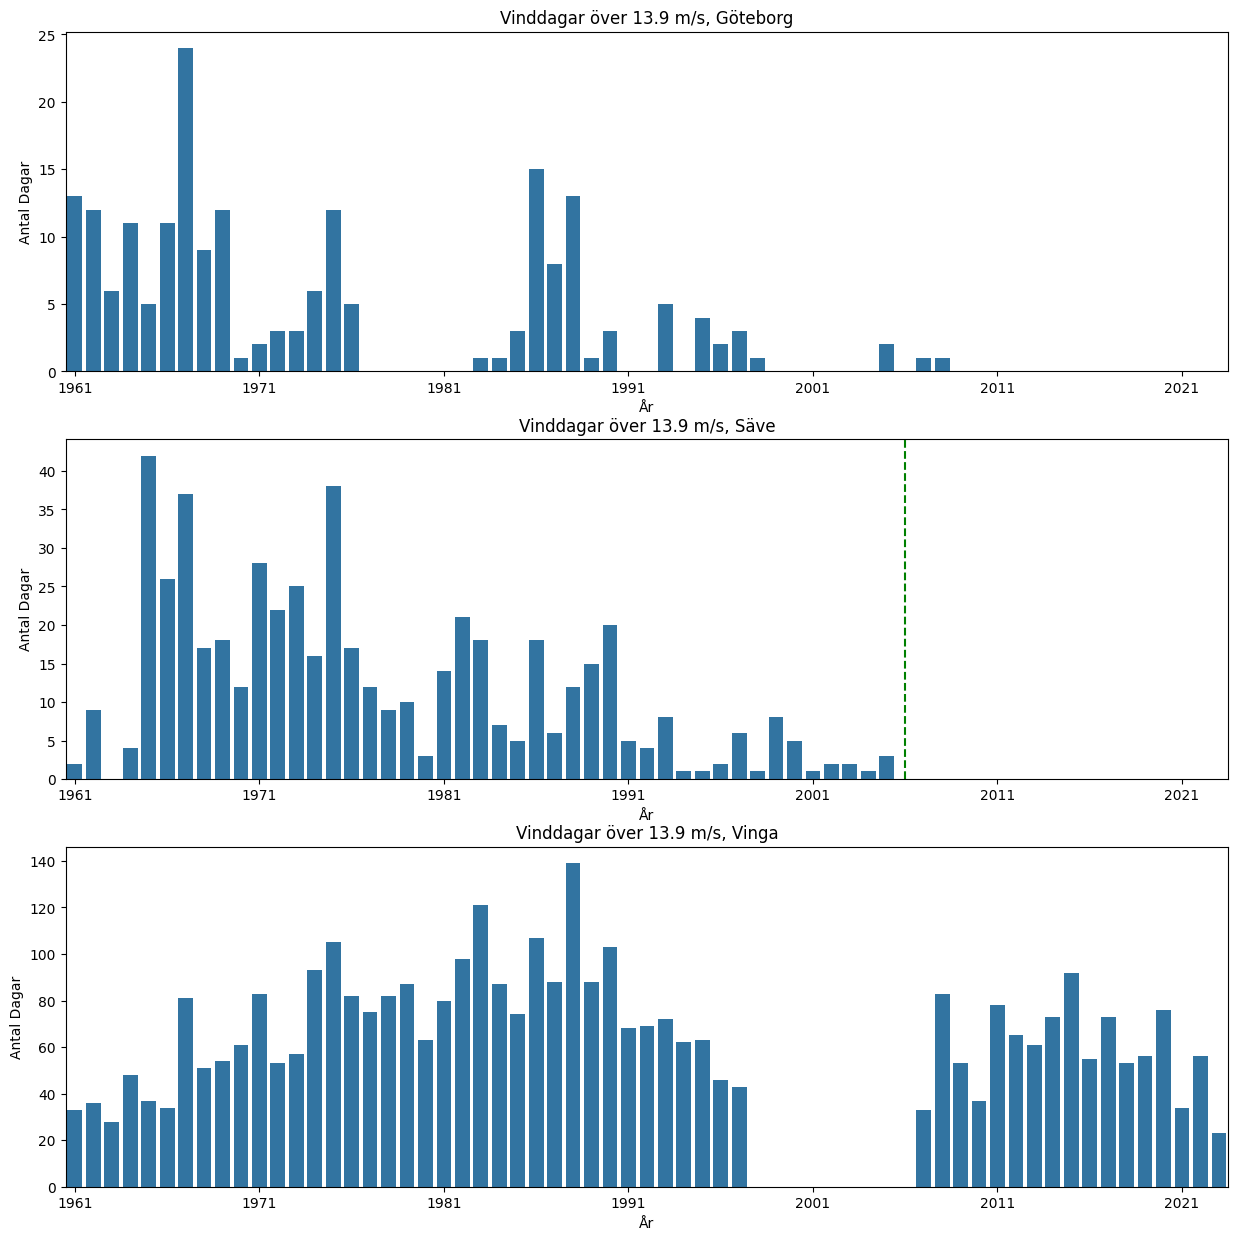

In [196]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1)
graph_gbg = sns.barplot(df_days_per_year_gbg, x='Year', y='Days')
plt.title('Vinddagar över 13.9 m/s, Göteborg')
plt.ylabel('Antal Dagar')
plt.xlabel('År')
plt.xticks(['1961', '1971', '1981', '1991', '2001', '2011', '2021'])
# plt.vlines(x=last_year_gbg, ymin=0, ymax=30)
plt.subplot(3, 1, 2)
graph_save = sns.barplot(df_days_per_year_save, x='Year', y='Days')
plt.title('Vinddagar över 13.9 m/s, Säve')
plt.ylabel('Antal Dagar')
plt.xlabel('År')
plt.xticks(['1961', '1971', '1981', '1991', '2001', '2011', '2021'])
graph_save.axvline(f'{last_year_save}', linestyle='--', c='g')
plt.subplot(3, 1, 3)
sns.barplot(df_days_per_year_vinga, x='Year', y='Days')
plt.title('Vinddagar över 13.9 m/s, Vinga')
plt.ylabel('Antal Dagar')
plt.xlabel('År')
plt.xticks(['1961', '1971', '1981', '1991', '2001', '2011', '2021'])
plt.show()